# Task

Demonstrate end-to-end clothing classification on a clothing items dataset using the YOLOv8 model. The dataset will be downloaded from Roboflow using a provided Roboflow API key, followed by loading the YOLOv8 model, performing inference on sample images, and visualizing the detection results.

###Project Use Case
In the overall outfit creation project, this will be used when the user is uploading their clothes into the app, which will then classify each piece of clothing into clothing type, color, and other markers as needed. Currently, the model is meant to classify only clothing **type**.

## Install Libraries
Install the necessary Python libraries: `roboflow` for dataset interaction and `ultralytics` for the YOLOv8 model.


In [ ]:
pip install roboflow ultralytics

## Authenticate Roboflow to Access Dataset


In [ ]:
from roboflow import Roboflow
from google.colab import userdata

# Replace 'your_roboflow_api_key' with your actual Roboflow API key
ROBOFLOW_API_KEY = userdata.get('roboflow')

# Initialize Roboflow client
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace()
print(workspace)

# Select the project and version
project = rf.workspace().project("clothing-olr9p-nhynp")
dataset = project.version(1).download("yolov8")

print("Roboflow dataset downloaded successfully.")

loading Roboflow workspace...
{
  "name": "TheBuilders",
  "url": "thebuilders",
  "projects": [
    "thebuilders/clothing-olr9p-nhynp"
  ]
}
loading Roboflow workspace...
loading Roboflow project...
Roboflow dataset downloaded successfully.


### Train YOLOv8 Model


Load the YOLOv8 object detection model and prepare the model for inference on the downloaded images.


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='clothing-1/data.yaml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_custom')

print("Model trained successfully")

Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=clothing-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

## Perform Object Detection Inference
Selects a few sample images from the downloaded dataset and runs the loaded YOLOv8 model to detect clothing items, obtaining bounding boxes and confidence scores for each detection.


In [ ]:
import os

# Access the dataset information to find the path to the validation images
val_image_path = os.path.join(dataset.location, 'valid', 'images')

# List all image files in the validation directory
all_val_images = [os.path.join(val_image_path, f) for f in os.listdir(val_image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a few sample images (e.g., the first 5)
sample_images = all_val_images[:5]

print(f"Found {len(all_val_images)} validation images.")
print(f"Selected {len(sample_images)} sample images for inference:")
for img_path in sample_images:
    print(img_path)

# Perform inference on the sample images
results = model.predict(sample_images, save=False, imgsz=640, conf=0.25, iou=0.7)

print("Inference completed for sample images.")

Found 270 validation images.
Selected 5 sample images for inference:
/content/clothing-1/valid/images/225_jpg.rf.75c776d5fc6b1f02fa89094e99405552.jpg
/content/clothing-1/valid/images/images227_jpg.rf.a5e4ed9c36497716cb415e5803e10727.jpg
/content/clothing-1/valid/images/21b402fb9d95e1d069c71859e8d4298ecf691799_jpg.rf.eb599a36aa036496beff9a4e275da0bc.jpg
/content/clothing-1/valid/images/img_0144-1-_jpeg_jpg.rf.bb14f5fb765cc155d3713fbdb6959dee.jpg
/content/clothing-1/valid/images/74aed21f09e7aadbe29191852fb8c8973ebec269_jpg.rf.23943cc058ea41f98429222c90ceee51.jpg

0: 640x640 (no detections), 298.6ms
1: 640x640 3 dresss, 298.6ms
2: 640x640 1 pants, 298.6ms
3: 640x640 1 pants, 1 sweater, 298.6ms
4: 640x640 1 dress, 298.6ms
Speed: 11.0ms preprocess, 298.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Inference completed for sample images.


## Visualize Detection Results

Display the sample images with the detected bounding boxes and class labels overlaid, clearly showing the identified clothing items.


Displaying detection results:


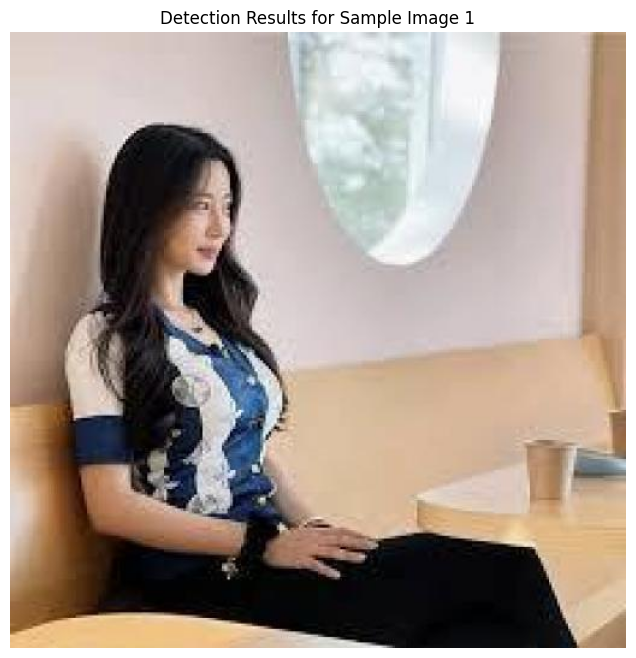

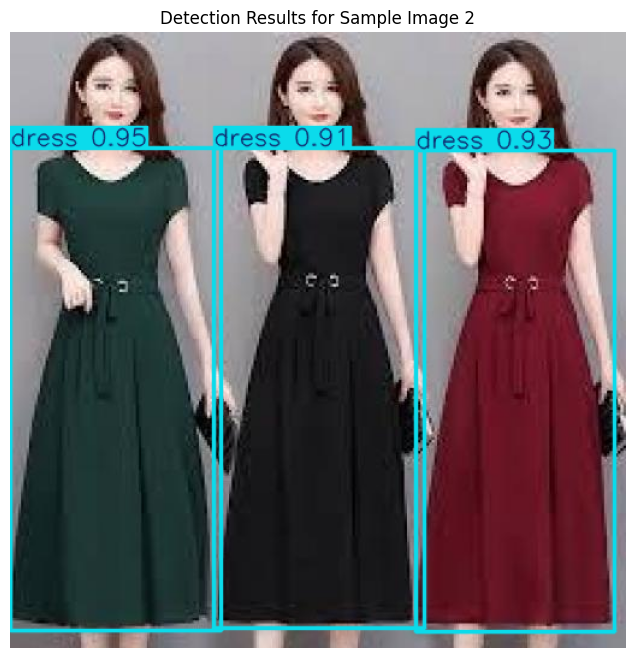

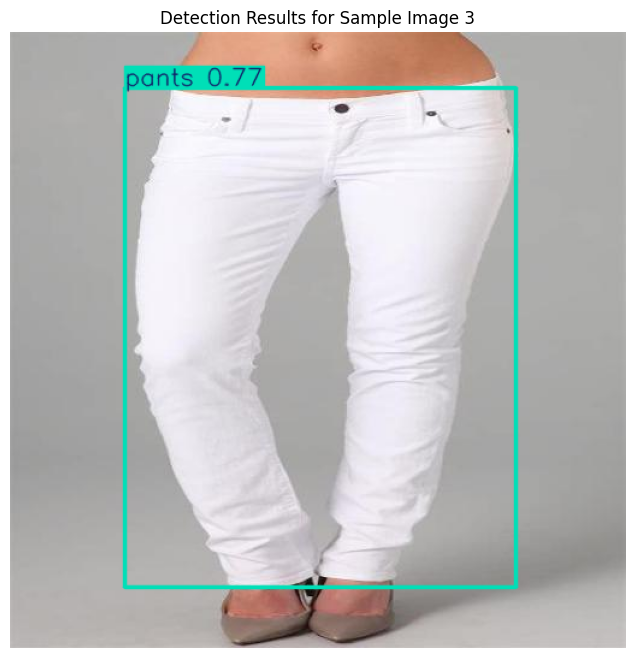

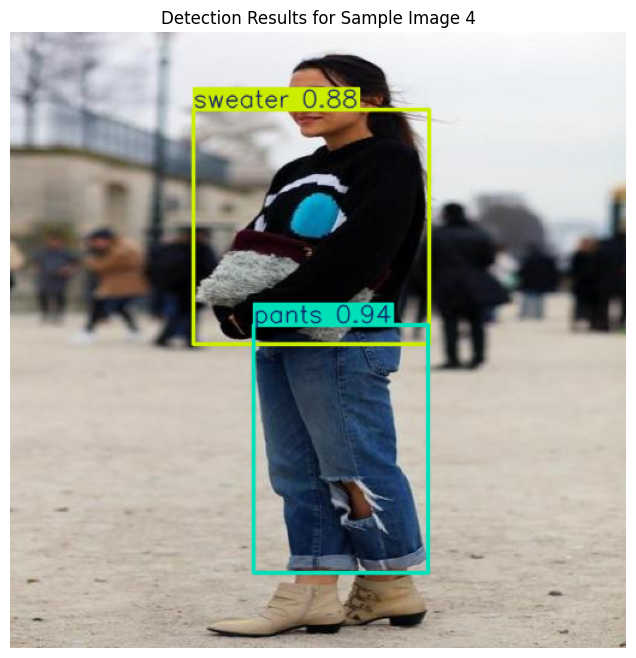

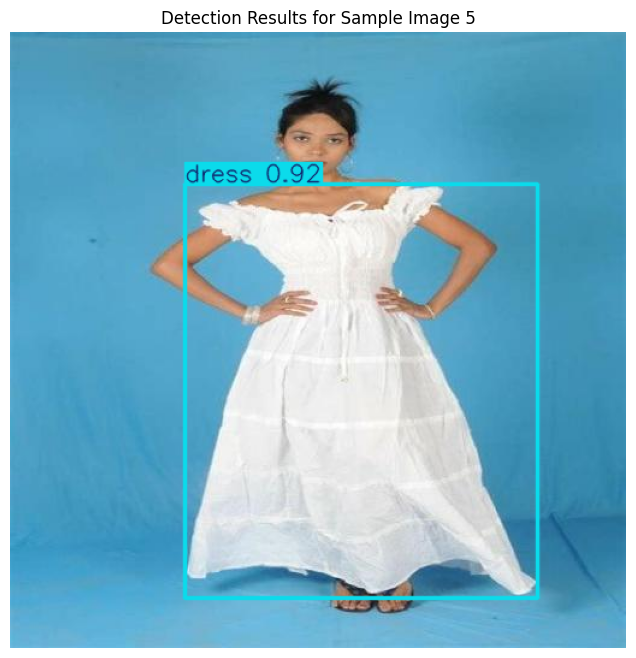

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

print("Displaying detection results:")

for i, r in enumerate(results):
    # Plot results on the original image
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"Detection Results for Sample Image {i+1}")
    plt.show()


# Observations/Next Steps

### Observations



*   The model was unable to classify the clothes in the first image example


*   Except for the first image, the model is able to detect different types of clothing items with strong confidence scores (> 0.7), which suggests that the model is very accurate
*   The final training speed (Speed: 4.3ms preprocess, 297.4ms inference, 0.0ms loss, 0.9ms postprocess per image) is a bit slow, but satisfactory for our dataset labeling use case








### Final Results
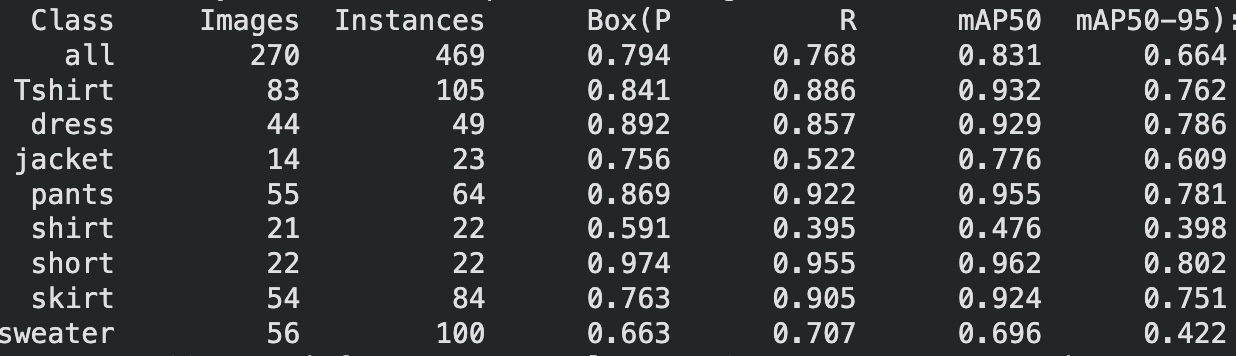

--> The values above showcase that although the model does a good job classifying clothes overall, it does not do well when attempting to classify jackets and shirts. This is corroborated with the first example, where the model fails to identify the clothes. This could potentially be because there are not many instances of either for the model to train on.


## Next Steps for CV Model


1.   Strengthen classification model by finding more examples of shirts and jackets.
2. Test with other image examples to ensure model can identify all types of clothes.
3.   Train a second model on datasets that classify clothes by color and patterns to make future outfit generation more cohesive.
4.   Connect to UI and test to view real-time classification



